# Data Generation
## Imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import utils.perspective_warp as pw
from pycocotools.coco import COCO
import os
import skimage.io as io

## Constants

In [2]:
IMAGE_DIR = '/mnt/d/workspace/perspectivenet_data_gen/data_dst/images'
ANNOTATION_DIR = '/mnt/d/workspace/perspectivenet_data_gen/data_dst/annotations'
BACKGROUND_IMG_DIR = '/mnt/d/workspace/perspectivenet_data_gen/image_source/background'
FOREGROUND_IMG_DIR = '/mnt/d/workspace/perspectivenet_data_gen/image_source/foreground'
COCO_DATA_DIR = '/mnt/d/workspace/perspectivenet_data_gen/coco_val2014'
COCO_ANNOTATION_FILE_PATH = '/mnt/d/workspace/perspectivenet_data_gen/coco_annotations/instances_val2014.json'

In [3]:
coco = COCO(COCO_ANNOTATION_FILE_PATH)

loading annotations into memory...
Done (t=4.11s)
creating index...
index created!


In [4]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds )
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

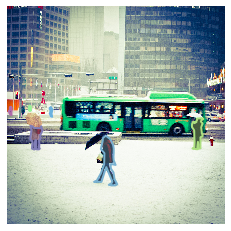

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
fg_files = os.listdir(FOREGROUND_IMG_DIR)
bg_files = os.listdir(BACKGROUND_IMG_DIR)

['00.jpg',
 '00114320c9df07c3329506.jpg',
 '00320003.jpg',
 '00_17.jpg',
 '010507_tv_studio_5_.jpg',
 '01_gd_amphi_statues_1__1.jpg',
 '01_priv_ent.jpg',
 '02_3_Day_Classroom_Overview.jpg',
 '0421_6_.jpg',
 '050908Library055_1.jpg']

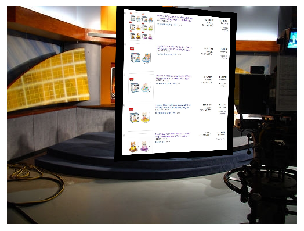

In [19]:
idx = np.random.randint(len(fg_files))
img_f = cv2.imread(os.path.join(FOREGROUND_IMG_DIR, fg_files[idx]))
padding_size_x = np.random.randint(16, 64)
padding_size_y = np.random.randint(16, 64)
img_f = cv2.copyMakeBorder(
    img_f,
    padding_size_y,
    padding_size_y,
    padding_size_x,
    padding_size_x,
    cv2.BORDER_CONSTANT,
    None,
    [0, 0, 0],
)
idx = np.random.randint(len(bg_files))
img_b = cv2.imread(os.path.join(BACKGROUND_IMG_DIR, bg_files[idx]))
# Transformation matrix by random rotation and movement
trans_m = pw.random_perspective_matrix_gen(img_f.shape, img_b.shape)
dst = pw.warp_and_add(img_f, img_b, trans_m)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.axis('off')
plt.show()